In [394]:
import numpy as np
from matplotlib import pyplot as plt
from skimage.exposure import equalize_hist
from skimage.filters.ridges import frangi

from src.models import InputImage
from src.utils import create_circle_mask
from src.well import well_hough_transformation


In [395]:
fishy = InputImage("zf6.jpg")

## HOUGH TRANSFORM & CIRCLE MASK

# Hough-transformation for the well
_____________________________________________________________
# Creating mask for well
_____________________________________________________________


Text(0.5, 1.0, 'mask')

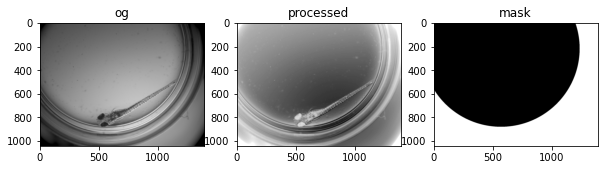

In [396]:
fishy = well_hough_transformation(fishy)
fishy = create_circle_mask(fishy)

fig, ax = plt.subplots(1, 3, figsize=(10, 5))
ax = ax.ravel()

ax[0].imshow(fishy.og, 'binary')
ax[0].set_title('og')

ax[1].imshow(fishy.processed, 'binary')
ax[1].set_title('processed')

ax[2].imshow(fishy.well_props.mask.og, 'binary')
ax[2].set_title('mask')

## DEFINING MASKED IMAGES

In [397]:
from skimage.color import rgb2gray
from src.utils import get_bounding_box_obj

bbox = get_bounding_box_obj(fishy.well_props.mask.og)
fishy.well_props.bounding_box = bbox

fishy.well_props.mask.cropped = fishy.well_props.mask.og[bbox.x1:bbox.x2 + 1, bbox.y1:bbox.y2 + 1]

masked = fishy.well_props.mask.og.astype(np.uint8) * rgb2gray(fishy.og.astype(np.uint8))
fishy.well_props.mask.masked = masked
fishy.well_props.mask.cropped_masked = masked[bbox.x1:bbox.x2 + 1, bbox.y1:bbox.y2 + 1]

# Storing result
fishy.processed = fishy.well_props.mask.cropped_masked.copy()

Text(0.5, 1.0, 'cropped masked')

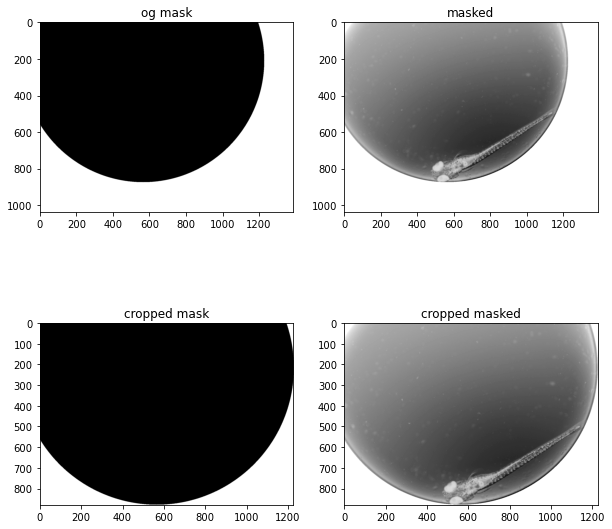

In [398]:
fig, ax = plt.subplots(2, 2, figsize=(10, 10))
ax = ax.ravel()

ax[0].imshow(fishy.well_props.mask.og, 'binary')
ax[0].set_title('og mask')

ax[1].imshow(fishy.well_props.mask.masked, 'binary')
ax[1].set_title('masked')

ax[2].imshow(fishy.well_props.mask.cropped, 'binary')
ax[2].set_title('cropped mask')

ax[3].imshow(fishy.well_props.mask.cropped_masked, 'binary')
ax[3].set_title('cropped masked')

## REMOVE BACKGROUND

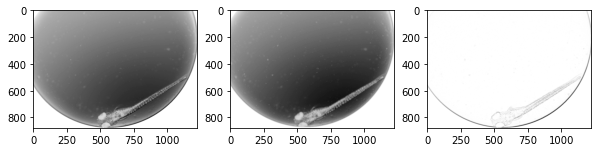

In [399]:
from skimage.restoration import rolling_ball

og = fishy.well_props.mask.cropped_masked
bg = rolling_ball(og)
res = og - bg

fig, ax = plt.subplots(1, 3, figsize=(10, 10))
ax[0].imshow(og, 'binary')
ax[1].imshow(bg, 'binary')
ax[2].imshow(res, 'binary')

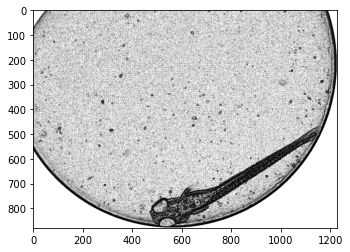

In [400]:
res_ = equalize_hist(res)
plt.imshow(res_, 'binary')

## FRANGI VESSELNESS FILTER

(array([416739.,  71397.,  75942.,  74796.,  74680.,  74991.,  75119.,
         74213.,  72240.,  67537.]),
 array([0.38304966, 0.4447447 , 0.50643973, 0.56813476, 0.6298298 ,
        0.69152483, 0.75321986, 0.8149149 , 0.87660993, 0.93830497,
        1.        ]),
 <BarContainer object of 10 artists>)

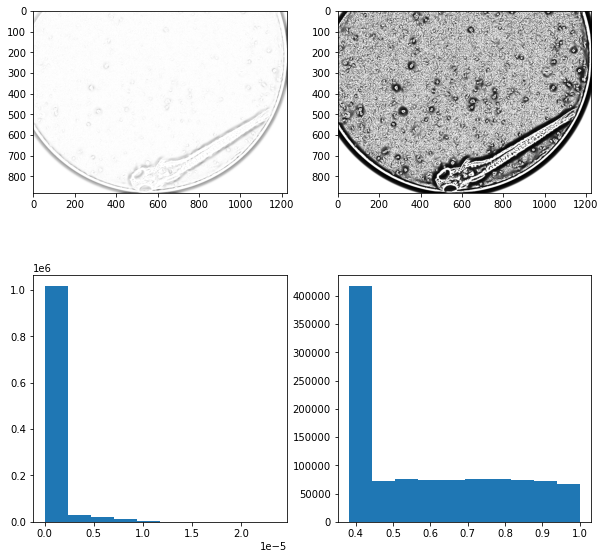

In [401]:
fig, ax = plt.subplots(2, 2, figsize=(10, 10))
ax = ax.ravel()

frangi_ = frangi(res_)
frangi__ = equalize_hist(frangi_)

ax[0].imshow(frangi_, 'binary')
ax[1].imshow(frangi__, 'binary')
ax[2].hist(frangi_.ravel())
ax[3].hist(frangi__.ravel())

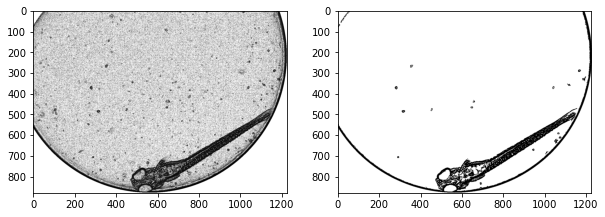

In [402]:
from skimage.morphology import remove_small_objects
from skimage.filters.thresholding import threshold_yen

fig, ax = plt.subplots(1, 2, figsize=(10, 10))
ax = ax.ravel()

sob = res_
sob_ = sob > threshold_yen(sob)

sob_ = remove_small_objects(sob_)

ax[0].imshow(sob, 'binary')
ax[1].imshow(sob_, 'binary')